In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import glob 
import os

folder_path = "ipl_male_csv2/"

csv_files = [
    file for file in glob.glob(os.path.join(folder_path,"*.csv"))
    if not file.endswith("_info.csv")
]

In [4]:
all_dfs = []
for file in csv_files:
    try:
        df = pd.read_csv(file)
        all_dfs.append(df)
    except Exception as e:
        print(f"Cannot read file {file} because of {e}")

In [5]:
full_df = pd.concat(all_dfs, ignore_index=True)

In [6]:
full_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,598068,2013,2013-05-18,M Chinnaswamy Stadium,1,0.1,Royal Challengers Bangalore,Chennai Super Kings,V Kohli,CH Gayle,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,598068,2013,2013-05-18,M Chinnaswamy Stadium,1,0.2,Royal Challengers Bangalore,Chennai Super Kings,V Kohli,CH Gayle,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,598068,2013,2013-05-18,M Chinnaswamy Stadium,1,0.3,Royal Challengers Bangalore,Chennai Super Kings,V Kohli,CH Gayle,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,598068,2013,2013-05-18,M Chinnaswamy Stadium,1,0.4,Royal Challengers Bangalore,Chennai Super Kings,V Kohli,CH Gayle,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,598068,2013,2013-05-18,M Chinnaswamy Stadium,1,0.5,Royal Challengers Bangalore,Chennai Super Kings,CH Gayle,V Kohli,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
full_df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [8]:
full_df.dtypes

match_id                    int64
season                     object
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type                object
player_dismissed           object
other_wicket_type         float64
other_player_dismissed    float64
dtype: object

In [9]:
full_df = full_df.sort_values(by=["start_date", "innings", "ball"])
full_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
34005,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
34006,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34007,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34008,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34009,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
full_df['ball_in_over'] = full_df['ball'].astype(str).str.split('.').str[1].astype(int)

In [11]:
full_df['is_4'] = (full_df['runs_off_bat'] == 4).astype(int)
full_df['is_6'] = (full_df['runs_off_bat'] == 4).astype(int)
full_df['is_Wicket'] = full_df['wicket_type'].notna().astype(int)

In [12]:
summary_by_ball = full_df.groupby(by = ['ball_in_over', 'striker']).agg(
    {
        'runs_off_bat': ['count', 'mean', 'sum'],
        'is_4':'sum',
        'is_6':'sum',
        'is_Wicket':'sum',
        'extras':'sum'
    }
)

In [13]:
summary_by_ball.columns = ['_'.join(col).strip() for col in summary_by_ball.columns.values]
summary_by_ball = summary_by_ball.reset_index()

In [14]:
summary_by_ball

,ball_in_over,striker,runs_off_bat_count,runs_off_bat_mean,runs_off_bat_sum,is_4_sum,is_6_sum,is_Wicket_sum,extras_sum
0,1,A Ashish Reddy,31,1.354839,42,1,1,3,4
1,1,A Badoni,116,1.353448,157,12,12,5,11
2,1,A Chandila,2,0.000000,0,0,0,0,0
3,1,A Chopra,13,0.384615,5,0,0,2,0
4,1,A Choudhary,4,0.750000,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4825,11,AM Rahane,1,0.000000,0,0,0,1,0
4826,11,JC Buttler,1,0.000000,0,0,0,0,0
4827,11,KR Mayers,1,0.000000,0,0,0,0,0
4828,11,T Stubbs,1,1.000000,1,0,0,0,0


In [15]:
summary_by_ball[summary_by_ball['striker'] == 'RG Sharma']

,ball_in_over,striker,runs_off_bat_count,runs_off_bat_mean,runs_off_bat_sum,is_4_sum,is_6_sum,is_Wicket_sum,extras_sum
442,1,RG Sharma,943,1.164369,1098,99,99,33,43
1073,2,RG Sharma,921,1.241042,1143,109,109,50,42
1711,3,RG Sharma,886,1.334086,1182,98,98,38,45
2364,4,RG Sharma,863,1.358053,1172,112,112,45,50
3020,5,RG Sharma,874,1.247140,1090,97,97,36,46
3679,6,RG Sharma,837,1.351254,1131,105,105,42,32
4234,7,RG Sharma,128,1.460938,187,17,17,1,7
4600,8,RG Sharma,20,1.750000,35,2,2,1,6
4783,9,RG Sharma,3,3.333333,10,1,1,0,1


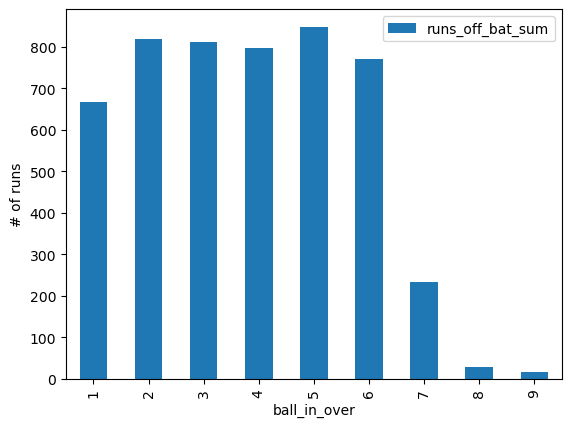

In [26]:
summary_by_ball[summary_by_ball['striker'] == 'CH Gayle'].plot.bar(x = "ball_in_over", y ="runs_off_bat_sum")
plt.ylabel('# of runs')
plt.show()

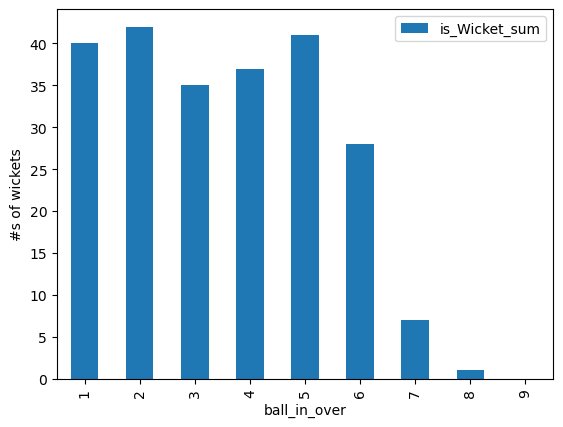

In [ ]:
summary_by_ball[summary_by_ball['striker'] == 'V Kohli'].plot.bar(x = "ball_in_over", y ="is_Wicket_sum")
plt.ylabel('#s of wickets')
plt.show()

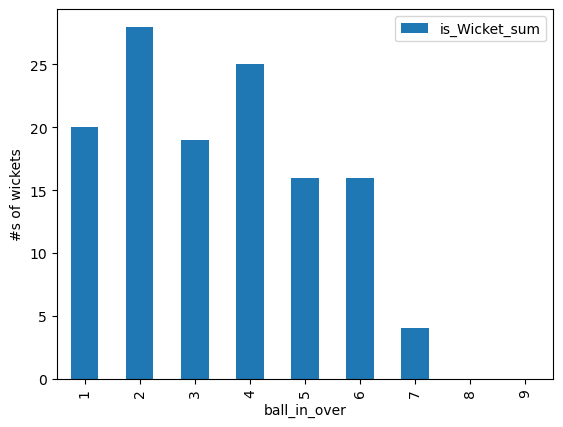

In [25]:
summary_by_ball[summary_by_ball['striker'] == 'CH Gayle'].plot.bar(x = "ball_in_over", y ="is_Wicket_sum")
plt.ylabel('#s of wickets')
plt.show()

In [ ]:
summary_by_ball['striker'].unique()

array(['A Ashish Reddy', 'A Badoni', 'A Chandila', 'A Chopra',
       'A Choudhary', 'A Flintoff', 'A Kumble', 'A Manohar', 'A Mhatre',
       'A Mishra', 'A Mithun', 'A Mukund', 'A Nehra', 'A Nortje',
       'A Raghuvanshi', 'A Singh', 'A Symonds', 'A Tomar', 'A Zampa',
       'AA Bilakhia', 'AA Jhunjhunwala', 'AA Noffke', 'AB Agarkar',
       'AB Barath', 'AB Dinda', 'AB McDonald', 'AB de Villiers',
       'AC Blizzard', 'AC Gilchrist', 'AC Thomas', 'AC Voges', 'AD Hales',
       'AD Mascarenhas', 'AD Mathews', 'AD Nath', 'AD Russell',
       'AF Milne', 'AG Murtaza', 'AG Paunikar', 'AJ Finch', 'AJ Hosein',
       'AJ Turner', 'AJ Tye', 'AK Markram', 'AL Menaria', 'AM Nayar',
       'AM Rahane', 'AN Ahmed', 'AN Ghosh', 'AP Dole', 'AP Majumdar',
       'AP Tare', 'AR Bawne', 'AR Patel', 'AS Joseph', 'AS Rajpoot',
       'AS Raut', 'AS Roy', 'AS Yadav', 'AT Carey', 'AT Rayudu',
       'AU Rashid', 'AUK Pathan', 'Abdul Samad', 'Abhishek Sharma',
       'Abishek Porel', 'Akash Deep', 'Ak